In [9]:
import pandas as pd
datos=pd.read_csv("zoo.csv")


#Imprimir etiquetas
datos = datos.drop('animal_name',axis=1)
print(datos['class_type'].unique())
etiquetas=datos['class_type'].unique()
print(datos.head())
print(datos.describe())




[1 4 2 7 6 5 3]
   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  class_type  
0         1         0     0     4     0         0           1  
1         1         0     0     4     1         0           1  
2         0         0     1     0     1         0           4  
3         1         0     0     4     0         0           1  
4         1         0     0     4     1         0           1  
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  1

In [11]:
#Separar en conjuntos de caracteristicas y etiquetas (salida)
x=datos.drop('class_type',axis=1)
y=datos[['class_type']]

In [12]:
#Dividir los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [13]:
#Crear modelo vecinos cercanos
from sklearn.tree import DecisionTreeClassifier
modelo=DecisionTreeClassifier()

In [14]:
# Entrenar modelo
modelo.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
#Realizar predicciones con los datos de prueba
y_obt=modelo.predict(x_test)

La exactitud es:  0.8709677419354839


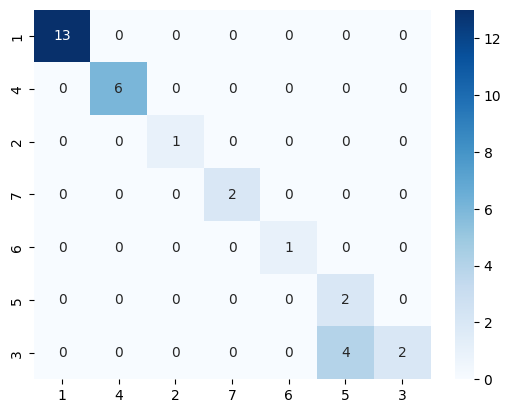

In [16]:
#Metricas de evaluacion
from sklearn.metrics import accuracy_score, confusion_matrix
exactitud = accuracy_score(y_test, y_obt)
print("La exactitud es: ", exactitud)
matriz_conf = confusion_matrix(y_test,y_obt)

#Mapa de calor de la matriz de confusion
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matriz_conf,annot=True, fmt='d', cmap="Blues",xticklabels=etiquetas,yticklabels=etiquetas)
plt.show()

In [41]:

animal = [
     "Mamifero",
     "Ave",
     "Reptil",
     "Pez",
     "Anfibio",
     "Insecto",
     "Invertebrado"
]

In [42]:
#Prediccion con un nuevo valor
#SERPIENTE
especie=modelo.predict([[0,0,1,0,0,1,1,1,0,1,1,0,0,1,0]])
an = int(especie)

name = animal[an-1]

print("La especie es: ",especie, name)

La especie es:  [7] Invertebrado


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-42-73a5dc8d7a9c>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  an = int(especie)


In [43]:
#Importancia de las caracteristicas SOLO arbol de decisión
importancia=modelo.feature_importances_
caracteristicas=datos.columns.tolist()

for j,k in zip(caracteristicas,importancia):
  print(j, ": ",k)

hair :  0.0
feathers :  0.2198638724699981
eggs :  0.02821063944116067
milk :  0.3865305391366651
airborne :  0.0
aquatic :  0.12654486835034928
predator :  0.0
toothed :  0.0
backbone :  0.07978000442519836
breathes :  0.0
venomous :  0.0
fins :  0.1590700761766287
legs :  0.0
tail :  0.0
domestic :  0.0
